In [ ]:
import mxnet as mx

In [ ]:
mx.__version__

'1.9.1'

In [ ]:
!nvidia-smi

Fri Aug 12 18:31:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   49C    P0    22W /  75W |    490MiB /  4096MiB |     18%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvcc --version

/bin/bash: línea 1: nvcc: orden no encontrada


In [ ]:
import pandas as pd
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.mx.trainer import Trainer
from gluonts.dataset.util import to_pandas
from gluonts.evaluation import make_evaluation_predictions
from gluonts.evaluation import Evaluator
from gluonts.model.predictor import Predictor
from pathlib import Path
import json
import matplotlib.pyplot as plt

In [ ]:
#!pip install 'fsspec>=0.3.3'
import dask
import dask.bag as db
import dask.dataframe as dd

In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [ ]:
data=dd.read_json('../data/*.json')  

In [ ]:
data.columns

Index(['o3', 'lat', 'no', 'dt_m', 'so2', 'no2', 'coords', 'nh3', 'lon', 'aqi',
       'pm10', 'co', 'dt_u', 'pm2_5'],
      dtype='object')

In [ ]:
data.head(npartitions=5)

,o3,lat,no,dt_m,so2,no2,coords,nh3,lon,aqi,pm10,co,dt_u,pm2_5
0,38.27,-35.3846,0.16,1656086400,0.06,0.78,-1079921025610592374,3.83,-70.9859,1,8.59,287.06,1656085710,5.04
0,38.27,-35.3846,0.16,1656086400,0.06,0.78,-1079921025610592374,3.83,-70.9859,1,8.59,287.06,1656086462,5.04
0,38.27,-35.3846,0.16,1656086400,0.06,0.78,-1079921025610592374,3.83,-70.9859,1,8.59,287.06,1656087218,5.04
0,38.27,-35.3846,0.16,1656086400,0.06,0.78,-1079921025610592374,3.83,-70.9859,1,8.59,287.06,1656087974,5.04
0,43.63,-35.3846,0.13,1656090000,0.09,0.84,-1079921025610592374,4.62,-70.9859,1,9.42,293.73,1656088723,5.58


In [ ]:
data['fecha']=dd.to_datetime(data['dt_m'],unit='s')

In [ ]:
data.head(npartitions=5)

,o3,lat,no,dt_m,so2,no2,coords,nh3,lon,aqi,pm10,co,dt_u,pm2_5,fecha
0,38.27,-35.3846,0.16,1656086400,0.06,0.78,-1079921025610592374,3.83,-70.9859,1,8.59,287.06,1656085710,5.04,2022-06-24 16:00:00
0,38.27,-35.3846,0.16,1656086400,0.06,0.78,-1079921025610592374,3.83,-70.9859,1,8.59,287.06,1656086462,5.04,2022-06-24 16:00:00
0,38.27,-35.3846,0.16,1656086400,0.06,0.78,-1079921025610592374,3.83,-70.9859,1,8.59,287.06,1656087218,5.04,2022-06-24 16:00:00
0,38.27,-35.3846,0.16,1656086400,0.06,0.78,-1079921025610592374,3.83,-70.9859,1,8.59,287.06,1656087974,5.04,2022-06-24 16:00:00
0,43.63,-35.3846,0.13,1656090000,0.09,0.84,-1079921025610592374,4.62,-70.9859,1,9.42,293.73,1656088723,5.58,2022-06-24 17:00:00


In [66]:
grouped_data=data.groupby(['coords','fecha']).mean().compute()

In [67]:
df=grouped_data.loc[-1079921025610592374]

In [72]:
data_test = common.ListDataset([{'start': df.index[0],'target': df['pm10']}],freq='1H')

<AxesSubplot:xlabel='fecha'>

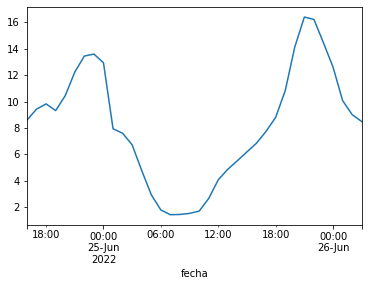

In [69]:
df['pm10'].plot()

In [73]:
predictor = Predictor.deserialize(Path('trained_model'))

forecast_it,ts_it=make_evaluation_predictions(dataset=data_test,predictor=predictor,num_samples=100)


TypeError: __init__() got an unexpected keyword argument 'freq'

In [53]:
forecast_it,ts_it=make_evaluation_predictions(dataset=data_test,predictor=predictor,num_samples=100)
forecasts = list(forecast_it)
tss = list(ts_it)
ts_entry = tss[0]
forecast_entry = forecasts[0]
plot_prob_forecasts(ts_entry, forecast_entry)

NameError: name 'predictor' is not defined